In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs, make_classification
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

from util.util import make_meshgrid, plot_contours, get_classification_data

## Linear Classification


In [2]:
X_lin_sep, y_lin_sep = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=0.5, random_state=0)

<IPython.core.display.Javascript object>


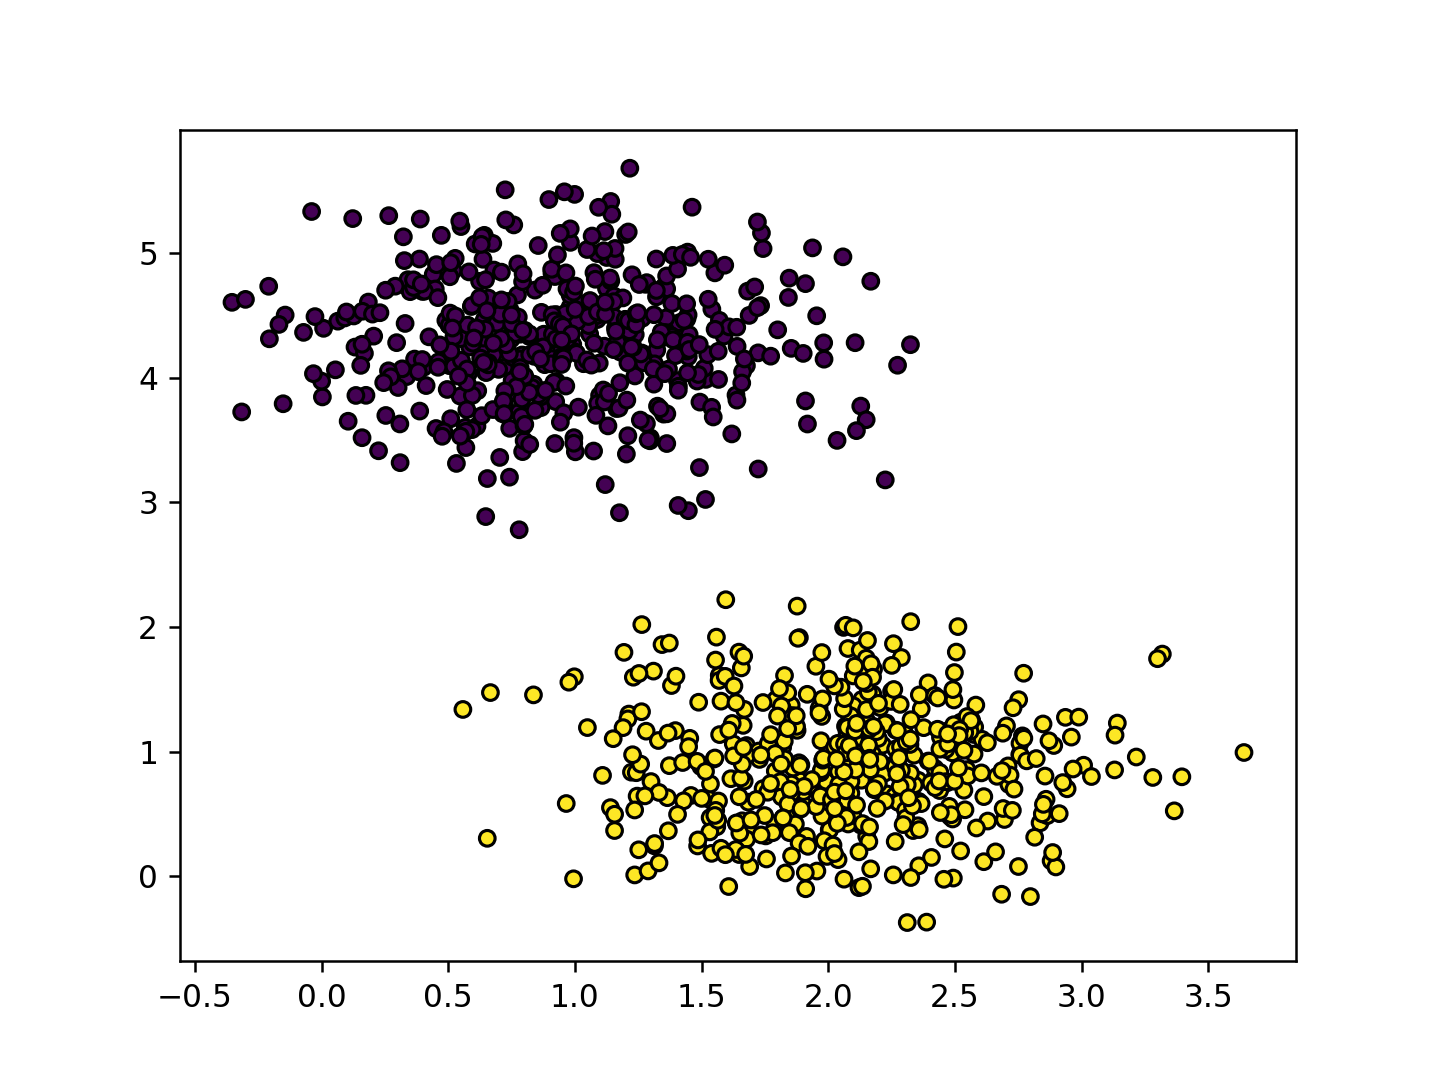

In [3]:
plt.figure()
plt.scatter(X_lin_sep[:, 0], X_lin_sep[:, 1], marker='o', c=y_lin_sep,
            s=25, edgecolor='k')
plt.show()

In [4]:
clf = LinearSVC()
clf.fit(X_lin_sep, y_lin_sep)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

<IPython.core.display.Javascript object>


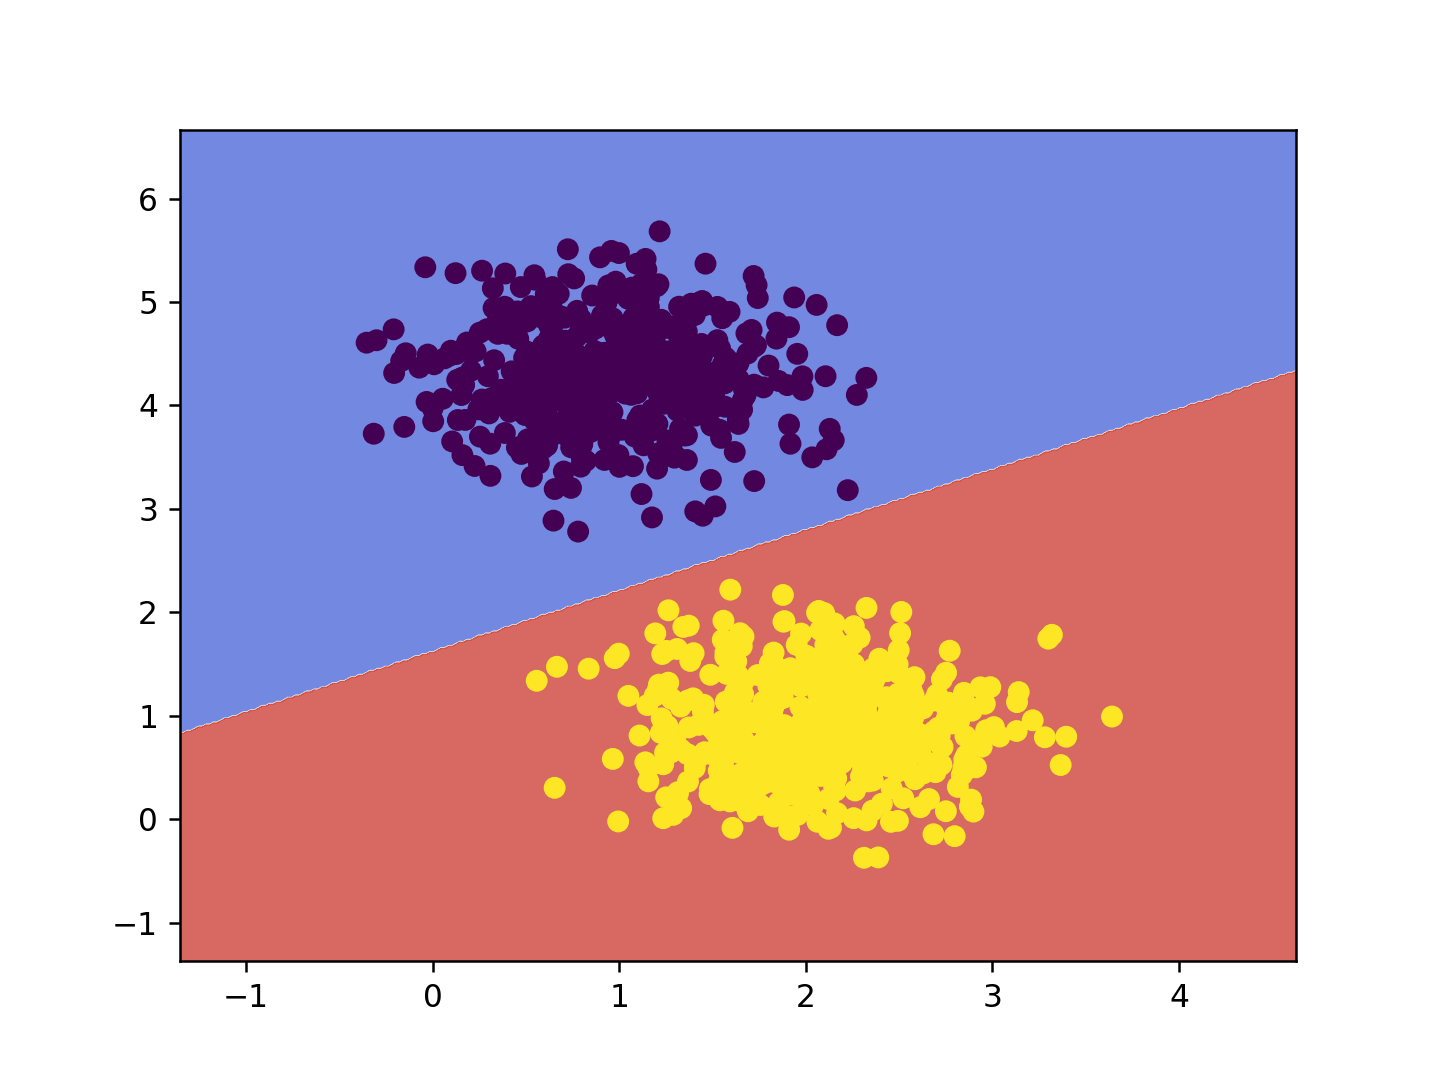

In [5]:
xx, yy = make_meshgrid(X_lin_sep[:, 0], X_lin_sep[:, 1])

plt.figure()
plot_contours(clf, xx, yy)
plt.scatter(X_lin_sep[:, 0], X_lin_sep[:,1 ], c=y_lin_sep)
plt.show()

In [6]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_lin_sep, y_lin_sep)

GaussianNB(priors=None)

<IPython.core.display.Javascript object>


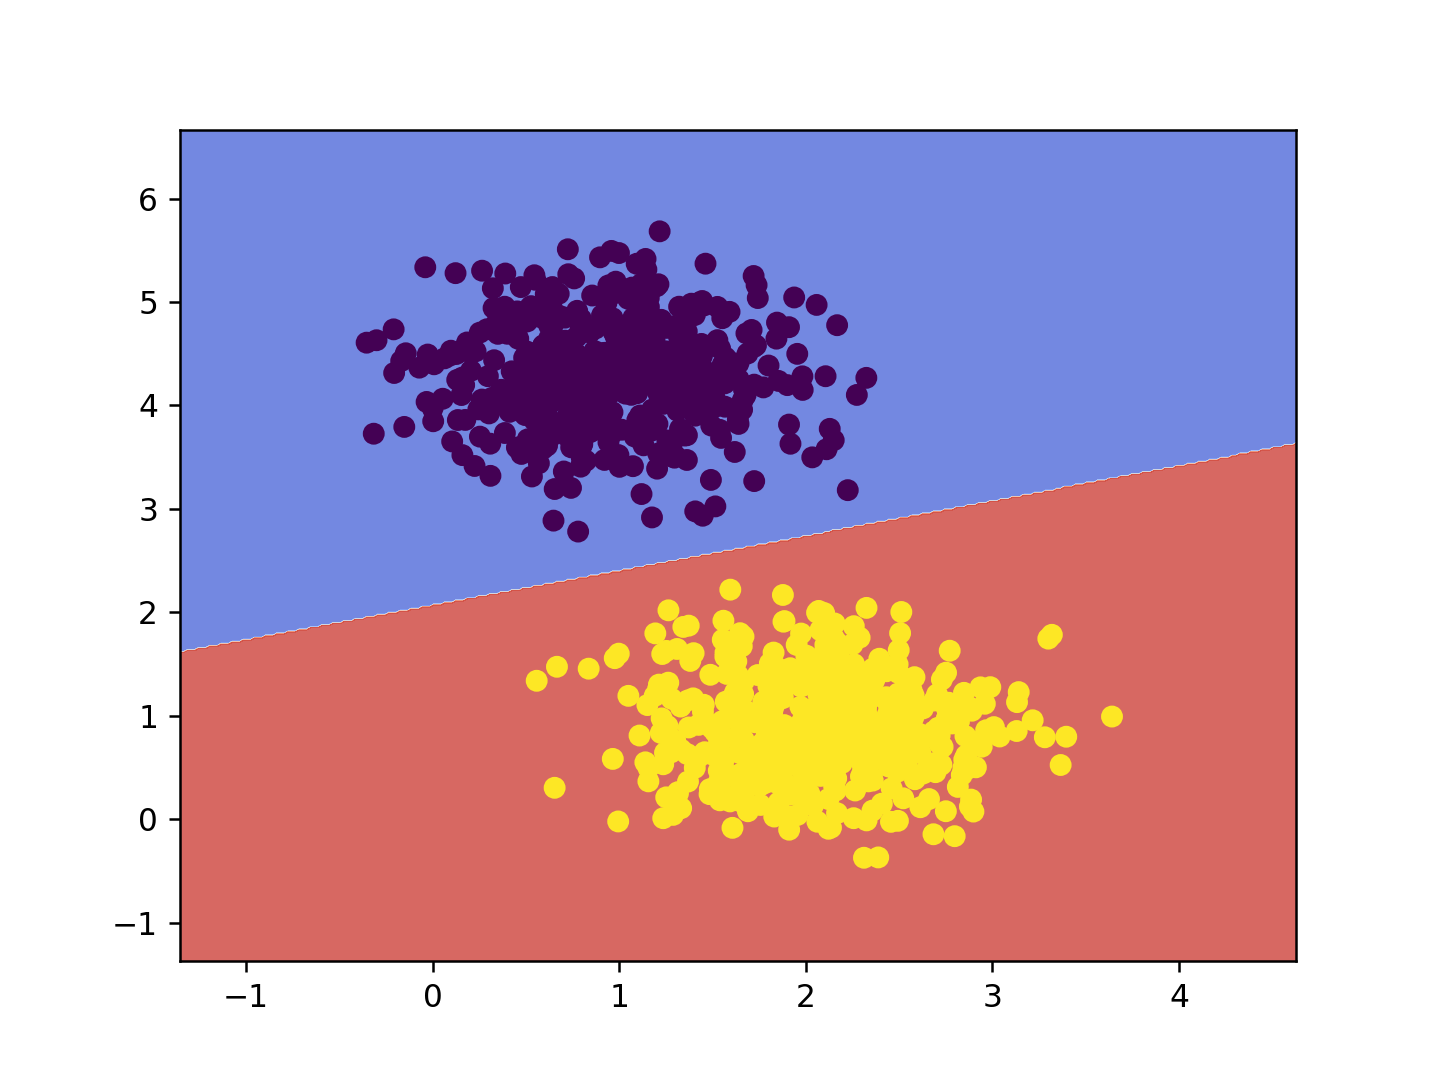

In [7]:
plt.figure()
plot_contours(naive_bayes, xx, yy)
plt.scatter(X_lin_sep[:, 0], X_lin_sep[:,1 ], c=y_lin_sep)
plt.show()

In [8]:
X_non_lin, y_non_lin = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, scale=0.4, random_state=12352)


<IPython.core.display.Javascript object>


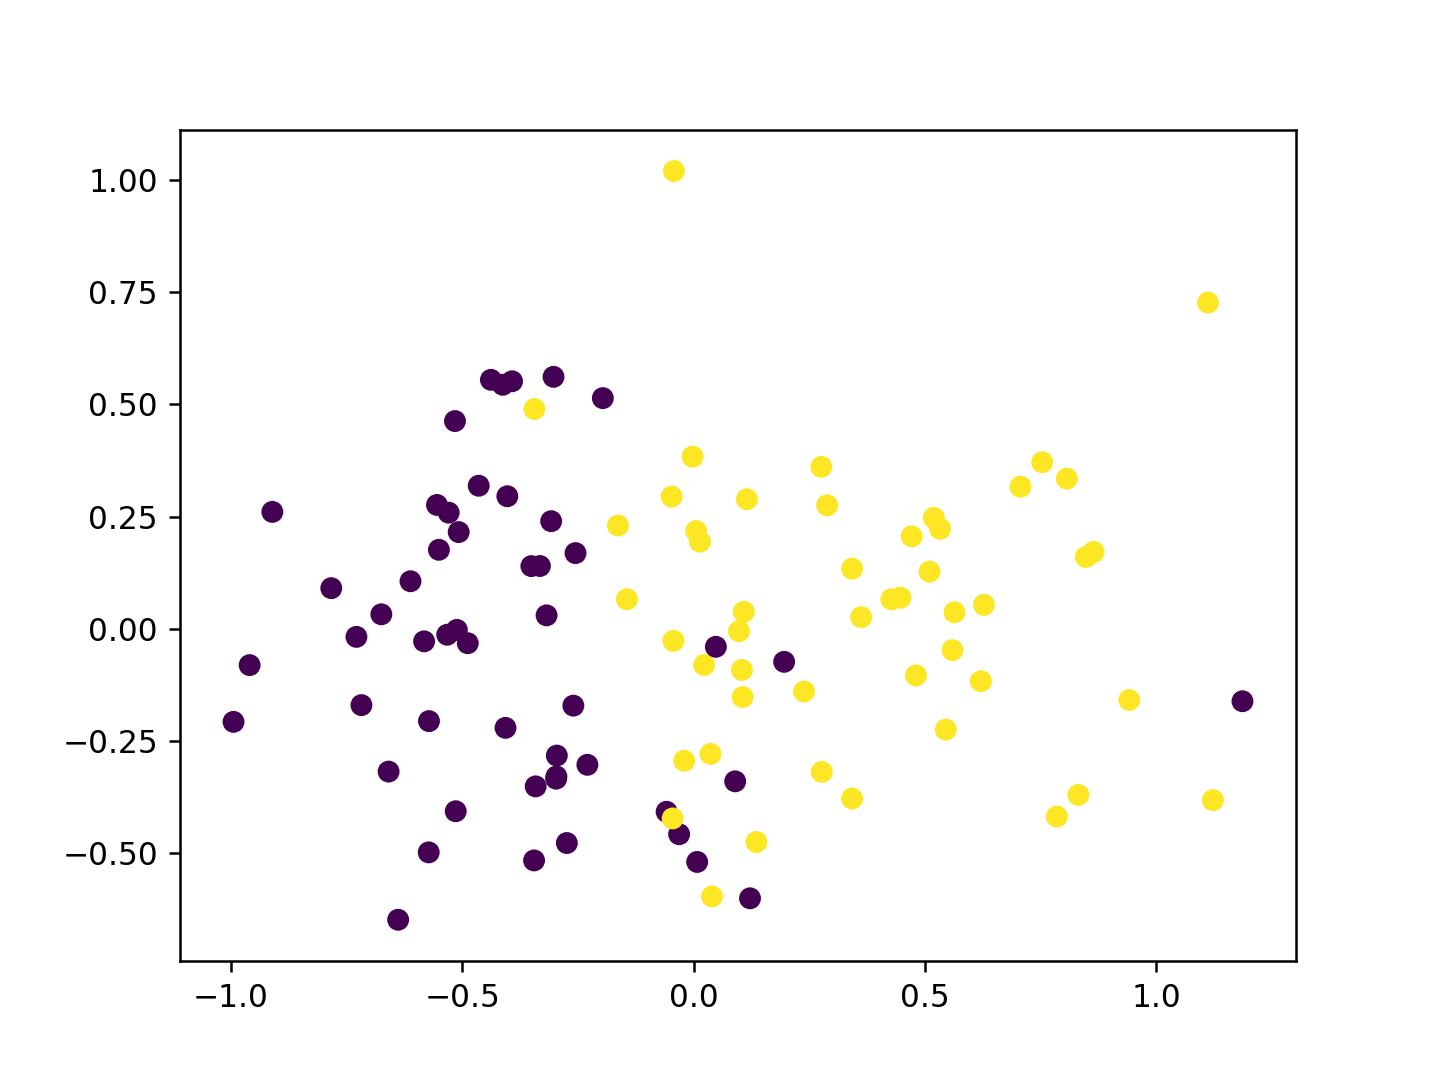

In [9]:
plt.figure()
plt.scatter(X_non_lin[:, 0], X_non_lin[:, 1], c=y_non_lin)
plt.show()

In [10]:
clf = LinearSVC()
clf.fit(X_non_lin, y_non_lin)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [11]:
C_range = [2**i for i in range(-5, 6)]

# create cross-validation 
cv = KFold(n_splits=5)

# list to hold scores
mean_scores = []

# outer loop to iterate over C range
for C in C_range:
    score_list = []
    # perform c
    for train_idx, test_idx in cv.split(X_non_lin):
        X_train = X_non_lin[train_idx]
        X_test = X_non_lin[test_idx]
        
        y_train = y_non_lin[train_idx]
        y_test = y_non_lin[test_idx]
        
        # create model
        svm = LinearSVC(C=C)
        # fit model
        svm.fit(X_train, y_train)
        
        # predict
        y_pred = svm.predict(X_test)
        
        # evaluate score
        score = accuracy_score(y_test, y_pred)
        
        # append score
        score_list.append(score)
    mean_score = np.mean(score_list)
    # append mean score
    mean_scores.append(mean_score)
    
max_score = np.max(mean_scores)
argmax_idx = np.argmax(mean_scores)
argmax_C = C_range[argmax_idx]

print("The best accuracy of %0.3f is obtained with C: %0.5f" % (max_score, argmax_C))

The best accuracy of 0.880 is obtained with C: 0.03125


In [12]:
X, y = get_classification_data()

<IPython.core.display.Javascript object>


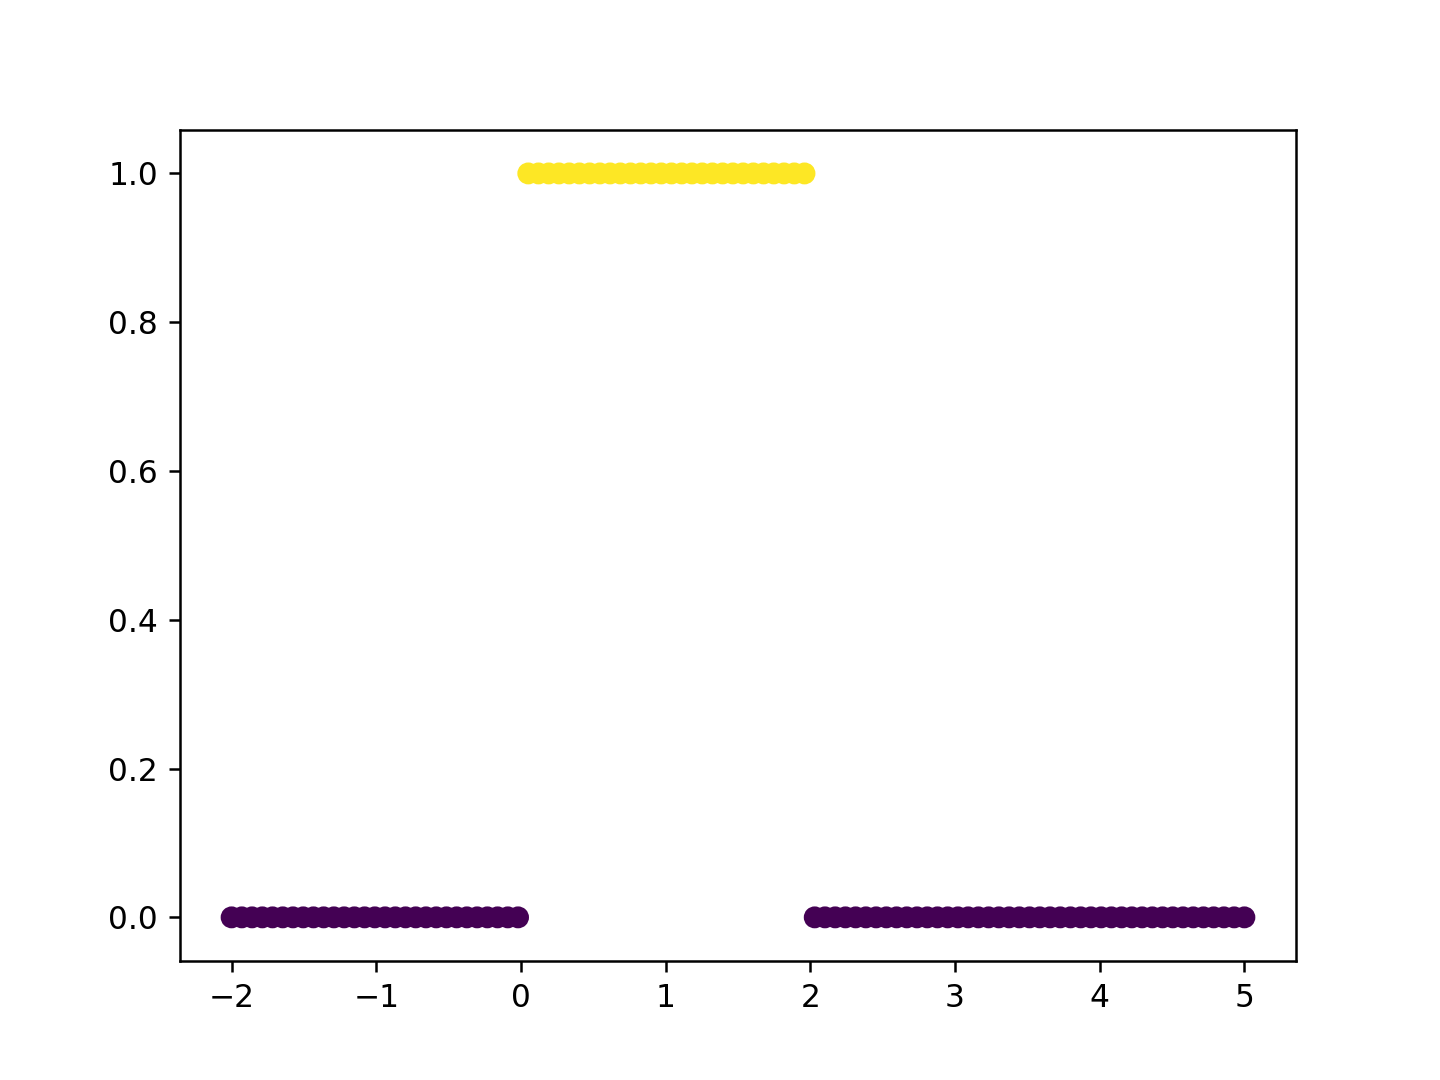

In [13]:
plt.figure()
plt.scatter(X, y, c=y)
plt.show()

<IPython.core.display.Javascript object>


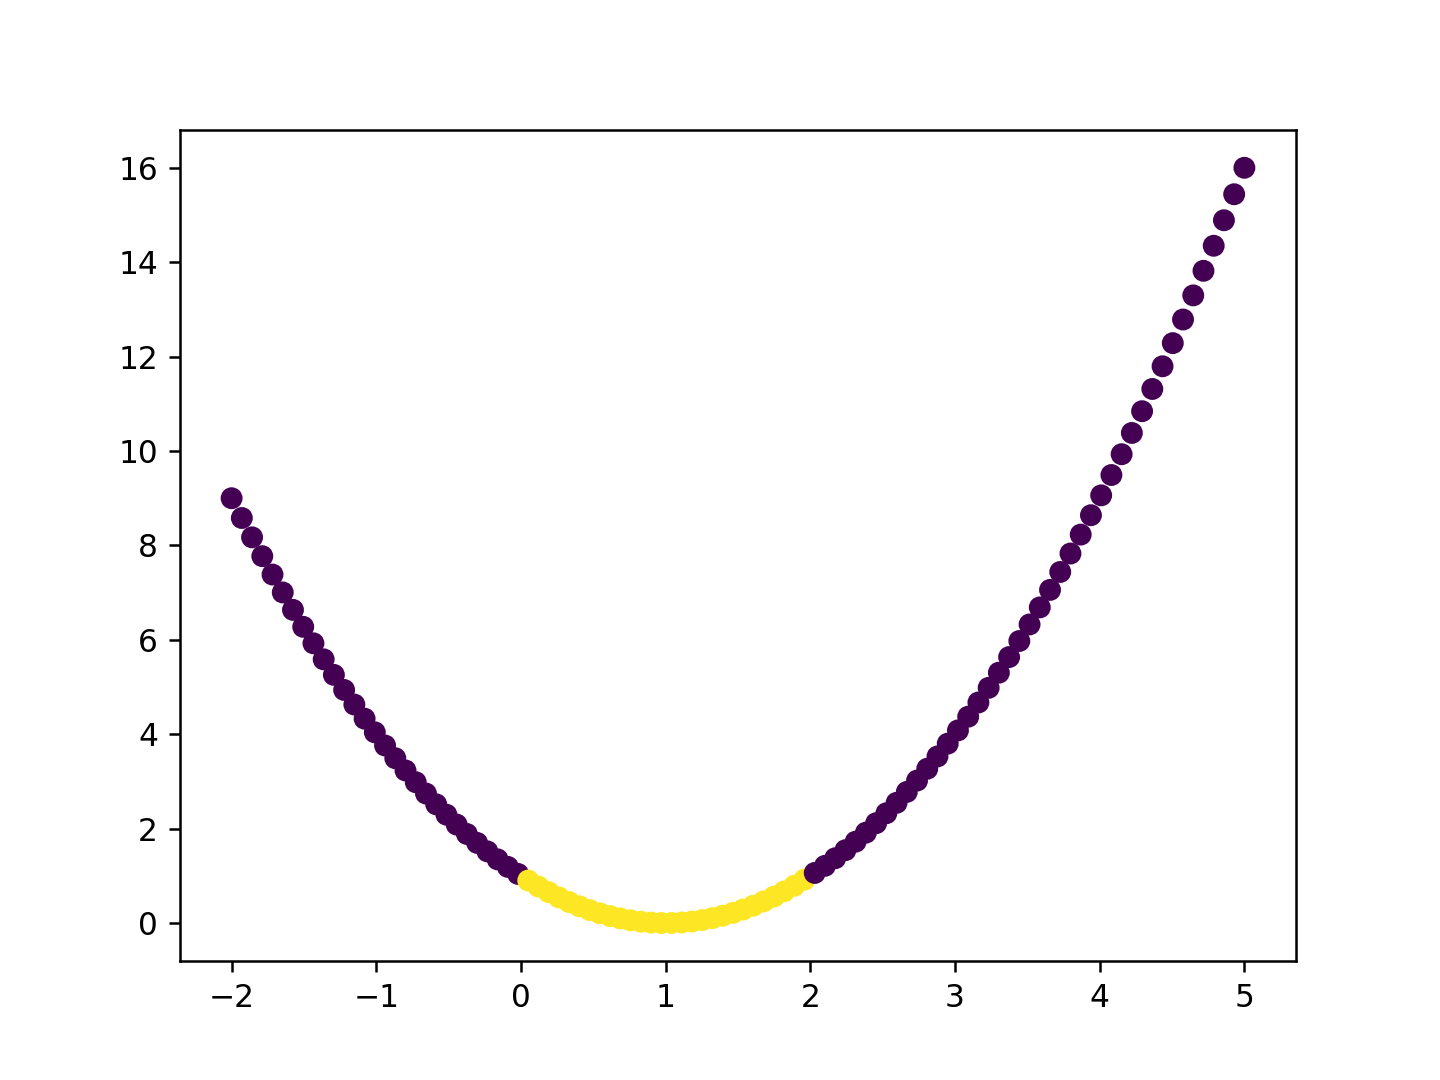

<IPython.core.display.Javascript object>


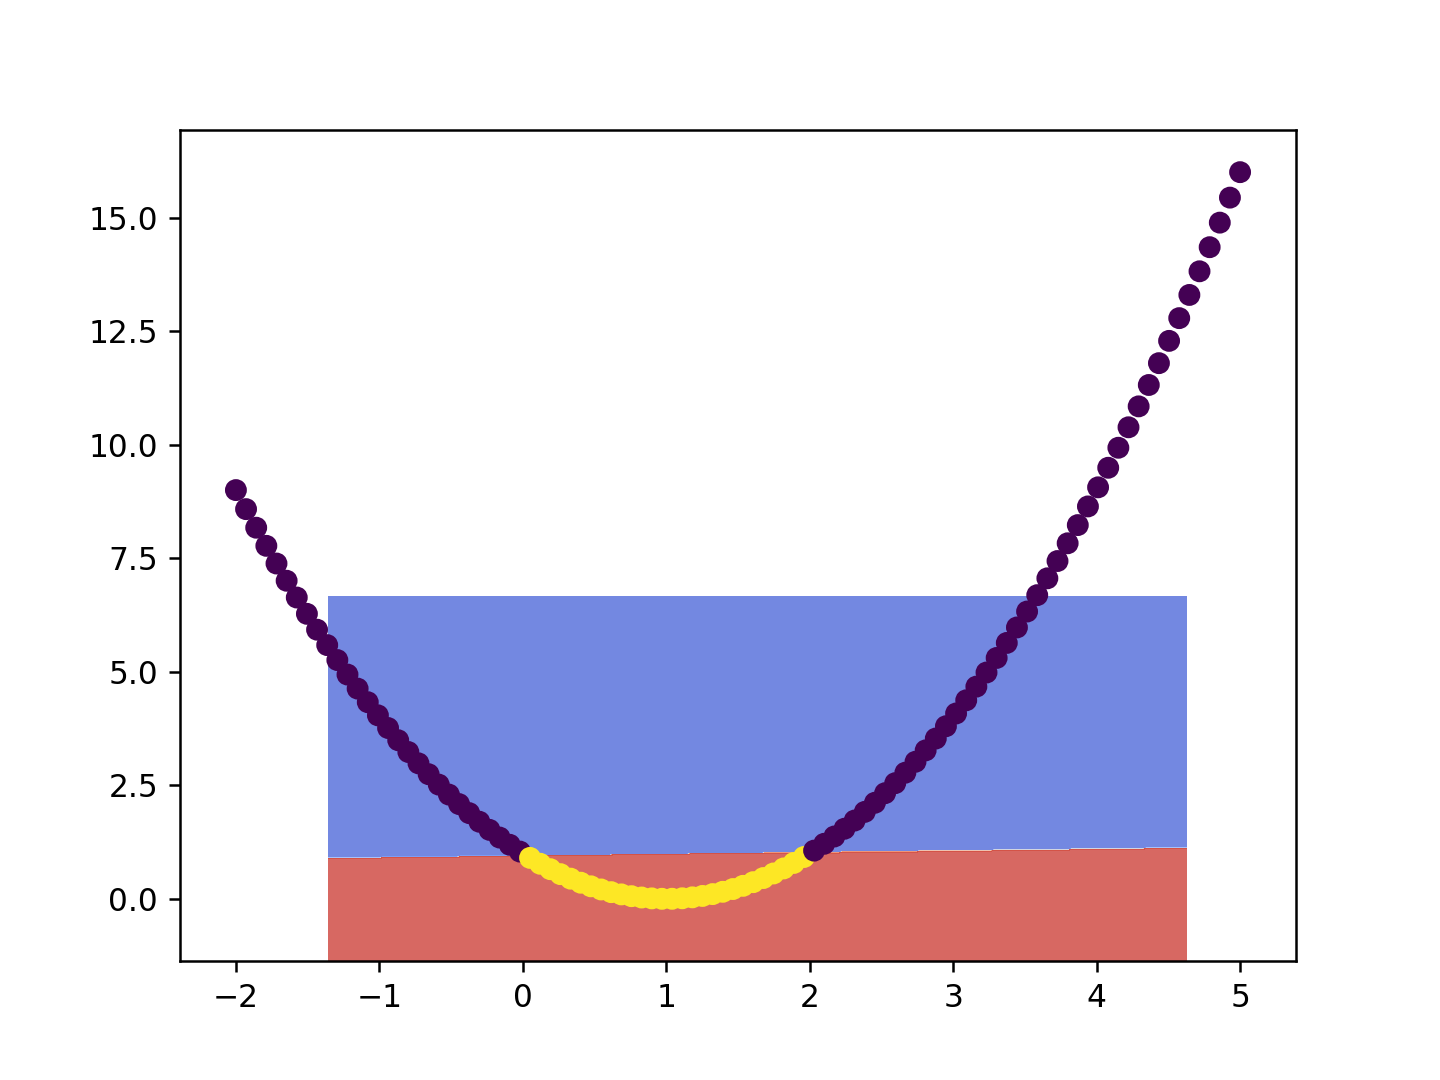

In [14]:
X_transformed = np.hstack([X, (X - 1)**2])

plt.figure()
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y)
plt.show()
clf = LinearSVC()
clf.fit(X_transformed, y)

plt.figure()
plot_contours(clf, xx, yy)
plt.scatter(X_transformed[:, 0], X_transformed[:,1 ], c=y)
plt.show()